In [80]:
import pandas as pd
%matplotlib inline

In [81]:
# Load your original data (no need to parse dates or set index)
import os
import random

def get_filenames_from_folder(folder_path):
    try:
        filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        return filenames
    except FileNotFoundError:
        print(f"Folder not found: {folder_path}")
        return []
    except Exception as e:
        print(f"Error reading folder: {e}")
        return []

households =  get_filenames_from_folder("/kaggle/input/newyorkelectricity/NY")
choice = random.choice(households)
df = pd.read_csv("/kaggle/input/newyorkelectricity/NY/" + choice)

print("Household : " , choice)
df

Household :  USA_NY_Massena.AP.726223_TMY3_HIGH.csv


,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly)
0,01/01 01:00:00,1.313713,12.629807,0.0,12.178516,0.0,0.337983,0.337983,0.337983,0.259136,0.059050,0.122837,0.511307
1,01/01 02:00:00,1.136251,13.082224,0.0,12.739643,0.0,0.353488,0.353488,0.353488,0.151163,0.034446,0.102976,0.470779
2,01/01 03:00:00,1.060213,13.015114,0.0,12.702349,0.0,0.352418,0.352418,0.352418,0.107973,0.024604,0.086497,0.465321
3,01/01 04:00:00,1.057558,13.531129,0.0,13.210176,0.0,0.366464,0.366464,0.366464,0.107973,0.024604,0.076346,0.458771
4,01/01 05:00:00,1.083348,14.681083,0.0,14.274934,0.0,0.395968,0.395968,0.395968,0.107973,0.024604,0.089962,0.441441
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,3.107225,12.493048,0.0,11.104228,0.0,0.308682,0.308682,0.308682,1.251000,0.285068,0.425376,0.813697
8756,12/31 21:00:00,2.952504,12.406172,0.0,11.116696,0.0,0.309003,0.309003,0.309003,1.139304,0.259616,0.379510,0.841671
8757,12/31 22:00:00,2.693732,12.277421,0.0,11.124915,0.0,0.309214,0.309214,0.309214,0.960589,0.218892,0.359615,0.822021
8758,12/31 23:00:00,2.207570,11.942531,0.0,11.007036,0.0,0.305908,0.305908,0.305908,0.714857,0.162896,0.289155,0.711354


In [82]:

# Generate the desired datetime index (hourly for 2012)
full_index = pd.date_range(start="2012-01-01 01:00", end="2012-12-31 00:00", freq="h")

# Create an empty DataFrame with the full datetime index
aligned_df = pd.DataFrame(index=full_index)

# Assign your data into the empty DataFrame by position
for i, col in enumerate(df.columns):
    aligned_df[col] = pd.Series(df[col].values, index=full_index[:len(df)])

aligned_df.index.name = "date"
aligned_df.drop('Date/Time', axis=1, inplace=True)

aligned_df.head(50)

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly)
date,,,,,,,,,,,,
2012-01-01 01:00:00,1.313713,12.629807,0.0,12.178516,0.0,0.337983,0.337983,0.337983,0.259136,0.059050,0.122837,0.511307
2012-01-01 02:00:00,1.136251,13.082224,0.0,12.739643,0.0,0.353488,0.353488,0.353488,0.151163,0.034446,0.102976,0.470779
2012-01-01 03:00:00,1.060213,13.015114,0.0,12.702349,0.0,0.352418,0.352418,0.352418,0.107973,0.024604,0.086497,0.465321
2012-01-01 04:00:00,1.057558,13.531129,0.0,13.210176,0.0,0.366464,0.366464,0.366464,0.107973,0.024604,0.076346,0.458771
2012-01-01 05:00:00,1.083348,14.681083,0.0,14.274934,0.0,0.395968,0.395968,0.395968,0.107973,0.024604,0.089962,0.441441
2012-01-01 06:00:00,1.151823,15.078996,0.0,14.298455,0.0,0.396638,0.396638,0.396638,0.107973,0.024604,0.106595,0.492612
2012-01-01 07:00:00,1.502107,16.880363,0.0,15.398073,0.0,0.427140,0.427140,0.427140,0.248338,0.056589,0.177474,0.569165
2012-01-01 08:00:00,1.985057,16.650428,0.0,14.964629,0.0,0.415177,0.415177,0.415177,0.507474,0.115639,0.281086,0.604781
2012-01-01 09:00:00,1.935328,17.426278,0.0,15.784974,0.0,0.437972,0.437972,0.437972,0.485880,0.110719,0.366050,0.511307


In [83]:
aligned_df["OT"] = aligned_df.sum(axis=1)

aligned_df.head(10)

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),OT
date,,,,,,,,,,,,,
2012-01-01 01:00:00,1.313713,12.629807,0.0,12.178516,0.0,0.337983,0.337983,0.337983,0.259136,0.059050,0.122837,0.511307,28.088315
2012-01-01 02:00:00,1.136251,13.082224,0.0,12.739643,0.0,0.353488,0.353488,0.353488,0.151163,0.034446,0.102976,0.470779,28.777945
2012-01-01 03:00:00,1.060213,13.015114,0.0,12.702349,0.0,0.352418,0.352418,0.352418,0.107973,0.024604,0.086497,0.465321,28.519324
2012-01-01 04:00:00,1.057558,13.531129,0.0,13.210176,0.0,0.366464,0.366464,0.366464,0.107973,0.024604,0.076346,0.458771,29.565948
2012-01-01 05:00:00,1.083348,14.681083,0.0,14.274934,0.0,0.395968,0.395968,0.395968,0.107973,0.024604,0.089962,0.441441,31.891250
2012-01-01 06:00:00,1.151823,15.078996,0.0,14.298455,0.0,0.396638,0.396638,0.396638,0.107973,0.024604,0.106595,0.492612,32.450972
2012-01-01 07:00:00,1.502107,16.880363,0.0,15.398073,0.0,0.427140,0.427140,0.427140,0.248338,0.056589,0.177474,0.569165,36.113530
2012-01-01 08:00:00,1.985057,16.650428,0.0,14.964629,0.0,0.415177,0.415177,0.415177,0.507474,0.115639,0.281086,0.604781,36.354626
2012-01-01 09:00:00,1.935328,17.426278,0.0,15.784974,0.0,0.437972,0.437972,0.437972,0.485880,0.110719,0.366050,0.511307,37.934452


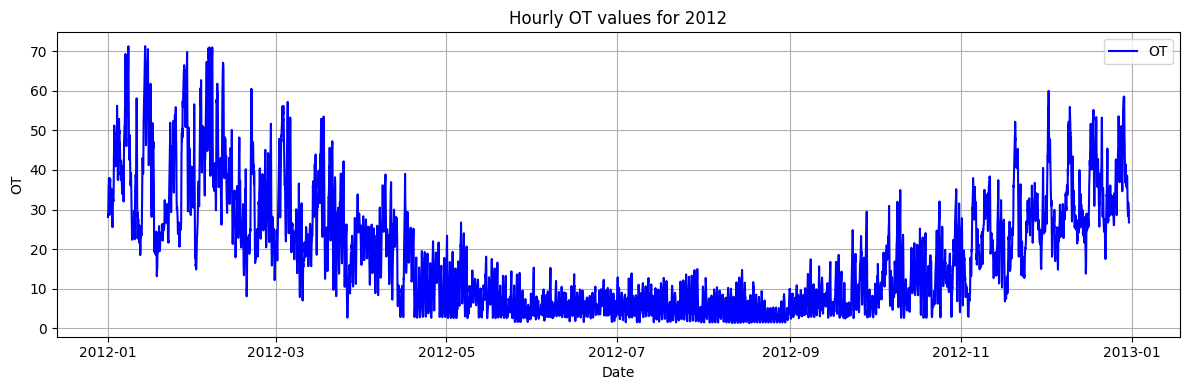

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the 'OT' column as a NumPy array
ot_values = aligned_df["OT"].to_numpy()
dates = aligned_df.index.to_numpy()  # This will be a NumPy datetime64 array

# Plot
plt.figure(figsize=(12, 4))
plt.plot(dates, ot_values, label="OT", color="blue")
plt.xlabel("Date")
plt.ylabel("OT")
plt.title("Hourly OT values for 2012")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

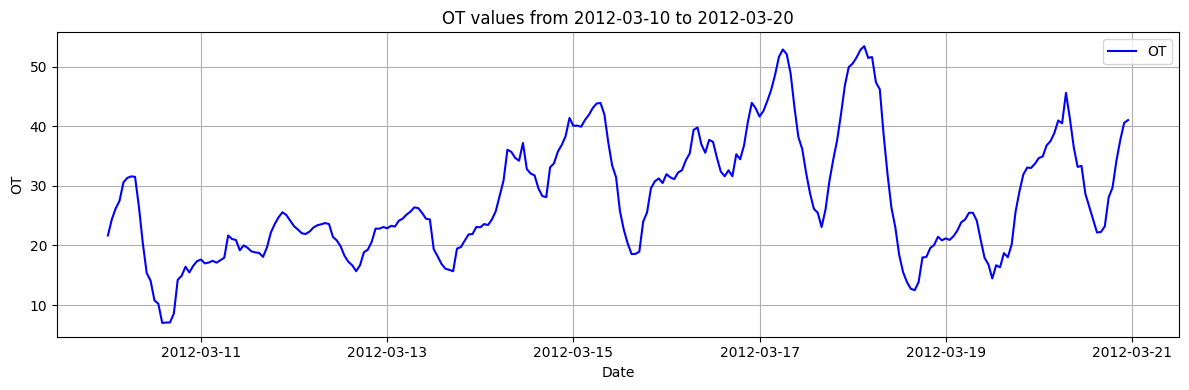

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define your time range (change as needed)
start_date = "2012-03-10"
end_date   = "2012-03-20"

# Slice the DataFrame by date
df_slice = aligned_df.loc[start_date:end_date]

# Extract NumPy arrays for plotting
dates = df_slice.index.to_numpy()
ot_values = df_slice["OT"].to_numpy()

# Plot the slice
plt.figure(figsize=(12, 4))
plt.plot(dates, ot_values, label="OT", color="blue")
plt.xlabel("Date")
plt.ylabel("OT")
plt.title(f"OT values from {start_date} to {end_date}")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [86]:
import os

# Define the output directory and filename
output_dir = "/kaggle/working/targetfixed"
output_file = "USA_AL_Anniston.Metro.AP.722287_TMY3_HIGH.csv"
output_path = os.path.join(output_dir, output_file)

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame
aligned_df.to_csv(output_path)

Args in experiment:
Args(is_training=1, model_id='h', model='DLinear', data='custom', root_path='/kaggle/working/targetfixed', data_path='USA_AL_Anniston.Metro.AP.722287_TMY3_HIGH.csv', features='MS', target='OT', freq='h', checkpoints='/kaggle/working/checkpoints/', seq_len=6, label_len=6, pred_len=6, individual=False, embed_type=0, enc_in=7, dec_in=7, c_out=7, d_model=512, n_heads=8, e_layers=2, d_layers=1, d_ff=2048, moving_avg=25, factor=1, distil=True, dropout=0.05, embed='timeF', activation='gelu', output_attention=False, do_predict=False, num_workers=1, itr=3, train_epochs=100, batch_size=32, patience=3, learning_rate=0.0001, des='test', loss='mse', lradj='type1', use_amp=False, use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1,2,3', test_flop=False)
Use GPU: cuda:0
>>>>>>>start training : 6h_DLinear_custom_ftMS_sl6_ll6_pl6_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_test_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 6997
val 871
test 871
	iters: 100, epoch: 1 | loss: 0.2145289
	speed:

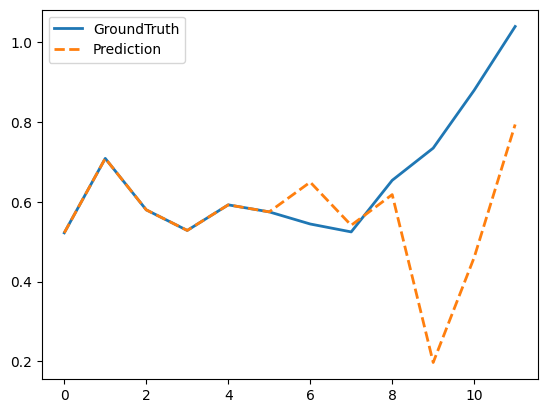

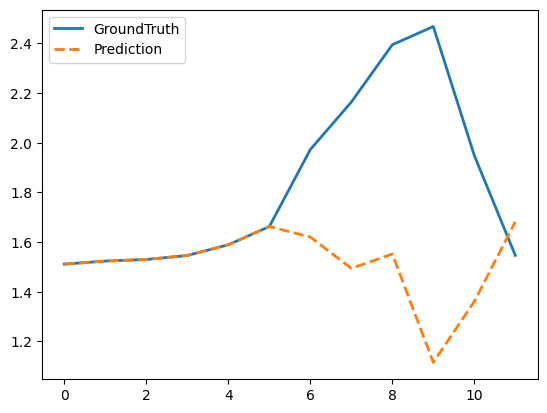

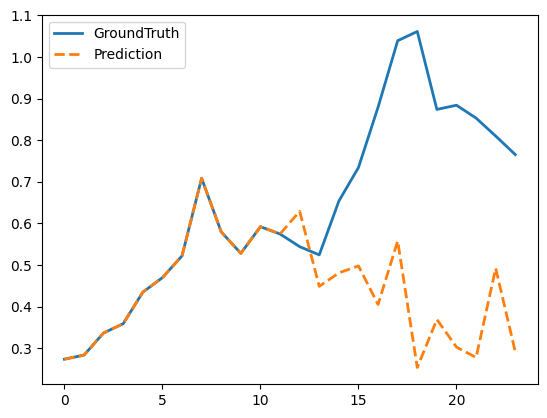

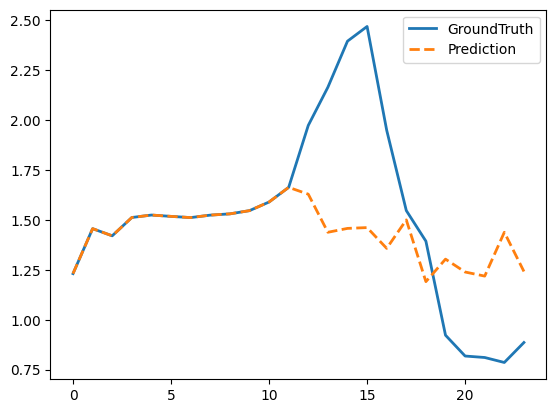

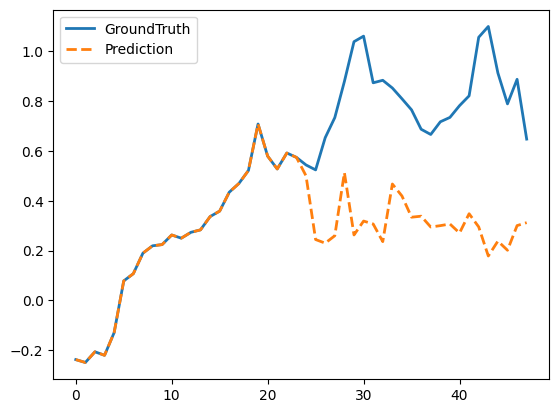

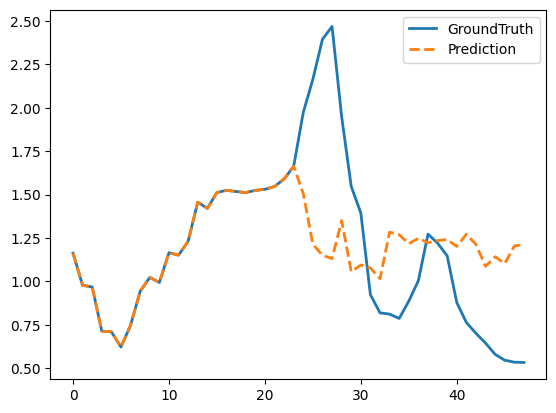

In [87]:
import argparse
import os
import torch
import sys
sys.path.append('/kaggle/input/dlinear/pytorch/dlinear811/1/DLinear')
from exp.exp_main import Exp_Main
import random
import numpy as np

class Args(argparse.Namespace):
    def __init__(self):
        super().__init__()

        # Model configuration
        self.is_training = 1
        self.model_id = 'h'
        self.model = 'DLinear'
        
        # Data loader configuration
        self.data = 'custom'
        self.root_path = output_dir
        self.data_path = output_file
        self.features = 'MS'  # options: [M, S, MS]
        self.target = 'OT'
        self.freq = 'h'  # options: [s, t, h, d, b, w, m]
        self.checkpoints = '/kaggle/working/checkpoints/'
        
        # Forecasting task configuration
        self.seq_len = 6
        self.label_len = 6
        self.pred_len = 6
        
        # DLinear configuration
        self.individual = False
        
        # Formers configuration
        self.embed_type = 0
        self.enc_in = 7
        self.dec_in = 7
        self.c_out = 7
        self.d_model = 512
        self.n_heads = 8
        self.e_layers = 2
        self.d_layers = 1
        self.d_ff = 2048
        self.moving_avg = 25
        self.factor = 1
        self.distil = True
        self.dropout = 0.05
        self.embed = 'timeF'  # options: [timeF, fixed, learned]
        self.activation = 'gelu'
        self.output_attention = False
        self.do_predict = False
        
        # Optimization configuration
        self.num_workers = 1
        self.itr = 3
        self.train_epochs = 100
        self.batch_size = 32
        self.patience = 3
        self.learning_rate = 0.0001
        self.des = 'test'
        self.loss = 'mse'  # loss function
        self.lradj = 'type1'
        self.use_amp = False
        
        # GPU configuration
        self.use_gpu = True
        self.gpu = 0
        self.use_multi_gpu = False
        self.devices = '0,1,2,3'
        self.test_flop = False

    # Optional: Add any methods if needed to manipulate or print out the configuration

# Example usage:
args = Args()

# import multiprocessing
# multiprocessing.set_start_method('spawn', force=True)

args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.dvices = args.devices.replace(' ', '')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]



Exp = Exp_Main
results_output_name = []
search_space = [6, 12, 24]

if args.is_training:
    for ii in range(args.itr):
        # setting record of experiments
        setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
            str(search_space[ii]) + args.model_id,
            args.model,
            args.data,
            args.features,
            search_space[ii],
            search_space[ii],
            search_space[ii],
            args.d_model,
            args.n_heads,
            args.e_layers,
            args.d_layers,
            args.d_ff,
            args.factor,
            args.embed,
            args.distil,
            args.des, ii)

        results_output_name.append(setting)

        args.seq_len = search_space[ii]
        args.label_len = search_space[ii]
        args.pred_len = search_space[ii]

        print('Args in experiment:')
        print(args)
        
        exp = Exp(args)  # set experiments
        print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
        exp.train(setting)

        print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
        exp.test(setting)

        if args.do_predict:
            print('>>>>>>>predicting : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
            exp.predict(setting, True)

        torch.cuda.empty_cache()
else:
    ii = 0
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(args.model_id,
                                                                                                  args.model,
                                                                                                  args.data,
                                                                                                  args.features,
                                                                                                  args.seq_len,
                                                                                                  args.label_len,
                                                                                                  args.pred_len,
                                                                                                  args.d_model,
                                                                                                  args.n_heads,
                                                                                                  args.e_layers,
                                                                                                  args.d_layers,
                                                                                                  args.d_ff,
                                                                                                  args.factor,
                                                                                                  args.embed,
                                                                                                  args.distil,
                                                                                                  args.des, ii)

    exp = Exp(args)  # set experiments
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting, test=1)
    torch.cuda.empty_cache()


Original shape: (864, 6, 1)


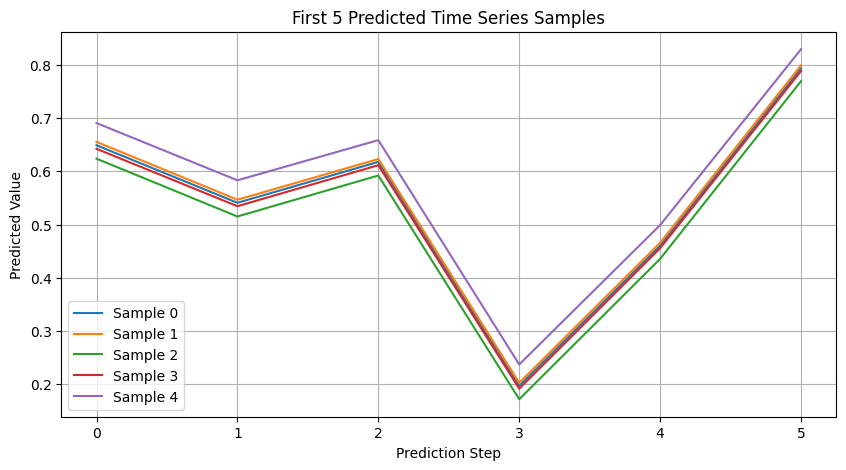

Original shape: (864, 12, 1)


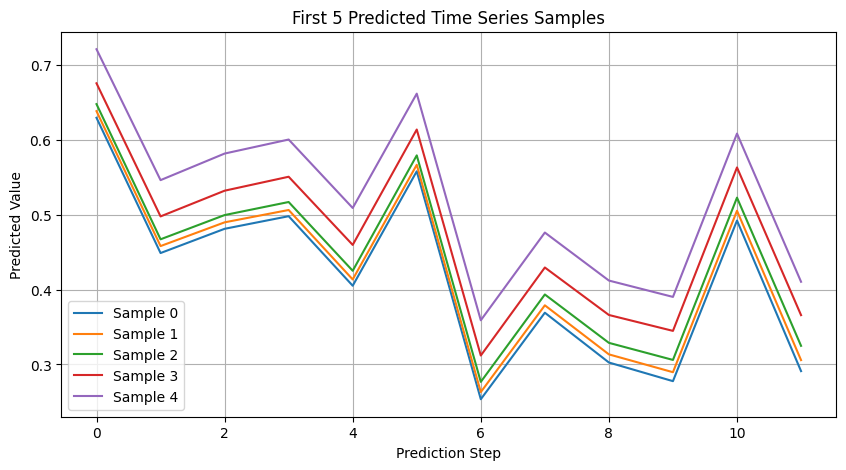

Original shape: (832, 24, 1)


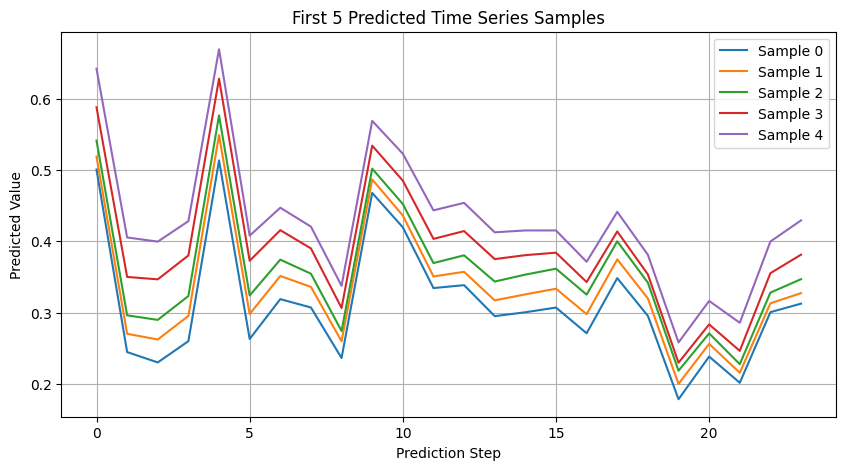

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Kaggle-compatible plotting
%matplotlib inline

# Load predictions
for i in range(3):
    file_path = "/kaggle/working/results/" + results_output_name[i] + "/pred.npy"
    data = np.load(file_path)
    
    # Shape should be (1728, 6, 1)
    print("Original shape:", data.shape)
    
    # Squeeze last dimension -> (1728, 6)
    data = data.squeeze(-1)
    
    # Plot first 5 prediction samples
    plt.figure(figsize=(10, 5))
    
    for i in range(5):
        plt.plot(data[i], label=f'Sample {i}')
    
    plt.title("First 5 Predicted Time Series Samples")
    plt.xlabel("Prediction Step")
    plt.ylabel("Predicted Value")
    plt.legend()
    plt.grid(True)
    plt.show()


In [89]:
#!rm -rf /kaggle/working/*
